# 🧠 Task 3: Cross-Domain Image Colorization

## 🔐 Setup Kaggle API

In [1]:
from google.colab import files
files.upload()  # Upload kaggle.json here

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"nagavaishnavis","key":"5a35a410ea18956896f7dadefe666489"}'}

In [2]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

## 📦 Download Dataset from Kaggle

In [3]:
# Example: Anime Sketch Colorization Dataset
!kaggle datasets download -d splcher/animefacedataset
!unzip -q animefacedataset.zip -d anime_faced_dataset

Dataset URL: https://www.kaggle.com/datasets/splcher/animefacedataset
License(s): DbCL-1.0
animefacedataset.zip: Skipping, found more recently modified local copy (use --force to force download)
replace anime_faced_dataset/images/0_2000.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [4]:
!ls

 animefacedataset.zip  'kaggle (1).json'   sample_data
 anime_faced_dataset    kaggle.json


## 📁 Load Dataset

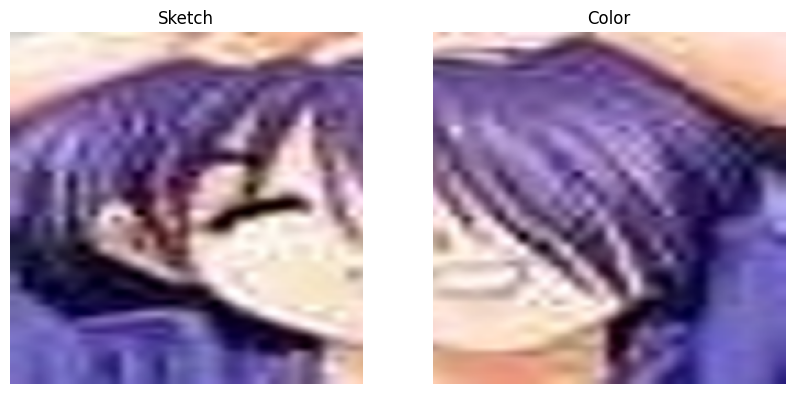

In [1]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Define the path to the dataset
dataset_dir = './anime_faced_dataset/images'  # Adjust this path if needed

# Function to load and split only N images
def load_and_split_images(path, size=(256, 256), max_images=50):
    sketch_images = []
    color_images = []

    image_files = sorted([f for f in os.listdir(path) if f.endswith(('.jpg', '.png'))])
    for i, filename in enumerate(image_files):
        if i >= max_images:
            break  # Stop after loading max_images

        img_path = os.path.join(path, filename)
        with Image.open(img_path) as img:
            img = img.resize((size[0]*2, size[1]))  # Resize to ensure it's 512x256
            img_array = np.array(img)

            # Ensure image has 3 channels (RGB)
            if img_array.shape[-1] == 3:
                sketch = img_array[:, :size[0], :]
                color = img_array[:, size[0]:, :]

                sketch_images.append(sketch)
                color_images.append(color)

    return np.array(sketch_images), np.array(color_images)

# Load only a few images (e.g., 50)
X, Y = load_and_split_images(dataset_dir, max_images=50)

# Display a sample pair
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Sketch")
plt.imshow(X[0])
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title("Color")
plt.imshow(Y[0])
plt.axis('off')
plt.show()


## 🧪 Train Model

In [ ]:
# TODO: Add your model architecture and training loop here
# Use the loaded X (grayscale/sketch) and Y (color images) as training data

## 📊 Evaluate Model

In [ ]:
# TODO: Evaluate model accuracy, precision, recall
# Use metrics and confusion matrix for evaluation

## 💾 Save Trained Model

In [ ]:
# TODO: Save model weights
# model.save('cross_domain_colorization_model.h5')